In [1]:
!python --version

Python 3.7.12


In [2]:
import numpy as np
import pandas as pd
import hvplot.pandas
import holoviews as hv
from bokeh.plotting import show

In [3]:
import magenta.music as mm

from magenta.models.music_vae import configs
from magenta.models.music_vae.trained_model import TrainedModel

def play(note_sequence):
  mm.play_sequence(note_sequence)

/Users/johannes/opt/anaconda3/envs/magenta/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/johannes/opt/anaconda3/envs/magenta/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [4]:
import note_seq
from note_seq.protobuf import music_pb2

twinkle_twinkle = music_pb2.NoteSequence()

# Add the notes to the sequence.
twinkle_twinkle.notes.add(pitch=60, start_time=0.0, end_time=0.5, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=0.5, end_time=1.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.0, end_time=1.5, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.5, end_time=2.0, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.0, end_time=2.5, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.5, end_time=3.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=3.0, end_time=4.0, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.0, end_time=4.5, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.5, end_time=5.0, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.0, end_time=5.5, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.5, end_time=6.0, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.0, end_time=6.5, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.5, end_time=7.0, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=7.0, end_time=8.0, velocity=80) 
twinkle_twinkle.total_time = 8

twinkle_twinkle.tempos.add(qpm=60);

twnkl = twinkle_twinkle

In [5]:
p = note_seq.plot_sequence(twnkl, show_figure = False)
p.yaxis.axis_label = 'MIDI note'
p.yaxis.ticker = list(range(60, 70, 1))
show(p)

In [6]:
play(twnkl)

In [7]:
import svglib.svglib as svglib
from reportlab.graphics import renderPDF


In [8]:
p.output_backend = "svg"
from bokeh.io import export_svg
filename = "figures/twinkle_in_MIDI"
export_svg(p, filename=filename + ".svg")

# see comment 2
# svglib.register_font('helvetica', '/home/fonts/Helvetica.ttf')
# step 2: read in svg
svg = svglib.svg2rlg(filename+".svg")

# step 3: save as pdf
renderPDF.drawToFile(svg, filename+".pdf")

In [9]:
import numpy as np
import os
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()


def interpolate(model, start_seq, end_seq, num_steps, max_length=32,
                assert_same_length=True, temperature=1,
                individual_duration=4.0):
  """Interpolates between a start and end sequence."""
  note_sequences = model.interpolate(
      start_seq, end_seq,num_steps=num_steps, length=max_length,
      temperature=temperature,
      assert_same_length=assert_same_length)

  print('Start Seq Reconstruction')
  play(note_sequences[0])
  print('End Seq Reconstruction')
  play(note_sequences[-1])
  print('Mean Sequence')
  play(note_sequences[num_steps // 2])
  print('Start -> End Interpolation')
  interp_seq = mm.sequences_lib.concatenate_sequences(
      note_sequences, [individual_duration] * len(note_sequences))
  play(interp_seq)
  mm.plot_sequence(interp_seq)
  return interp_seq if num_steps > 3 else note_sequences[num_steps // 2]

def download(note_sequence, filename):
  mm.sequence_proto_to_midi_file(note_sequence, filename)
  files.download(filename)

print('Done')

Instructions for updating:
non-resource variables are not supported in the long term
Done


In [10]:
BASE_DIR = "gs://download.magenta.tensorflow.org/models/music_vae/colab2"

mel_2bar_config = configs.CONFIG_MAP['cat-mel_2bar_big']
mel_2bar = TrainedModel(mel_2bar_config, batch_size=4, checkpoint_dir_or_path=BASE_DIR + '/checkpoints/mel_2bar_big.ckpt')

2024-04-18 12:13:58.696724: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


INFO:tensorflow:Building MusicVAE model with BidirectionalLstmEncoder, CategoricalLstmDecoder, and hparams:
{'max_seq_len': 32, 'z_size': 512, 'free_bits': 0, 'max_beta': 0.5, 'beta_rate': 0.99999, 'batch_size': 4, 'grad_clip': 1.0, 'clip_mode': 'global_norm', 'grad_norm_clip_to_zero': 10000, 'learning_rate': 0.001, 'decay_rate': 0.9999, 'min_learning_rate': 1e-05, 'conditional': True, 'dec_rnn_size': [2048, 2048, 2048], 'enc_rnn_size': [2048], 'dropout_keep_prob': 1.0, 'sampling_schedule': 'inverse_sigmoid', 'sampling_rate': 1000, 'use_cudnn': False, 'residual_encoder': False, 'residual_decoder': False, 'control_preprocessing_rnn_size': [256]}
INFO:tensorflow:
Encoder Cells (bidirectional):
  units: [2048]

INFO:tensorflow:
Decoder Cells:
  units: [2048, 2048, 2048]

Instructions for updating:
Use `tf.cast` instead.


/Users/johannes/opt/anaconda3/envs/magenta/lib/python3.7/site-packages/magenta/models/music_vae/lstm_utils.py:99: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  name=name),
/Users/johannes/opt/anaconda3/envs/magenta/lib/python3.7/site-packages/magenta/contrib/rnn.py:750: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  self._names["W"], [input_size + self._num_units, self._num_units * 4])
/Users/johannes/opt/anaconda3/envs/magenta/lib/python3.7/site-packages/magenta/contrib/rnn.py:753: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  initializer=tf.constant_initializer(0.0))


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


/Users/johannes/opt/anaconda3/envs/magenta/lib/python3.7/site-packages/magenta/models/music_vae/base_model.py:199: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_initializer=tf.random_normal_initializer(stddev=0.001))
/Users/johannes/opt/anaconda3/envs/magenta/lib/python3.7/site-packages/magenta/models/music_vae/base_model.py:205: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_initializer=tf.random_normal_initializer(stddev=0.001))
2024-04-18 12:14:00.509969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Restoring parameters from gs://download.magenta.tensorflow.org/models/music_vae/colab2/checkpoints/mel_2bar_big.ckpt


2024-04-18 12:14:00.811548: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [11]:
input_seqs = [twnkl]
mels = []
for i,ns in enumerate(input_seqs):
  print("Melody", i)
  mm.plot_sequence(ns)
  # play(ns)

  mels.extend(
      mel_2bar_config.data_converter.from_tensors(
          mel_2bar_config.data_converter.to_tensors(ns)[1]))

Melody 0


Loading BokehJS ...

In [12]:
len(mels)

1

In [13]:
nss = mels
model = mel_2bar
encodings =  model.encode(nss)
# a random sample, the central value, and the sigmas fromthe multidimensional gaussian
for i,z in enumerate(encodings):
    show(hv.render(pd.DataFrame(z).T.hvplot.bar(height=100,width=1600)))

In [14]:
zs = pd.DataFrame()

zs['Standard deviations'] = encodings[2].squeeze()
zs['Means'] = encodings[1].squeeze()
zs['Sample'] = encodings[0].squeeze()

zs = zs.sort_values('Standard deviations').reset_index().reset_index().melt(id_vars=['level_0', 'index'])
zs

level_0  index             variable     value
0           0    182  Standard deviations  0.054064
1           1     12  Standard deviations  0.065152
2           2    371  Standard deviations  0.101236
3           3    471  Standard deviations  0.104032
4           4    226  Standard deviations  0.149428
...       ...    ...                  ...       ...
1531      507    413               Sample  2.505459
1532      508     92               Sample  0.634475
1533      509    189               Sample  0.521053
1534      510    375               Sample -1.383290
1535      511    198               Sample  0.431799

[1536 rows x 4 columns]

In [15]:
zs.hvplot.bar(x='level_0', y='value', by='variable', xlim=(0, 50), subplots=True).opts(width=1000, height=700).cols(1)

:NdLayout   [variable]
   :Bars   [level_0]   (value)

In [16]:
%load_ext rpy2.ipython

In [17]:
%%R
library(tidyverse)
library(here)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


here() starts at /Users/johannes/work/music


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1233 rows containing missing values (`position_stack()`). 

R[write to console]: 2: Removed 6 rows containing missing values (`geom_col()`). 



In addition: Warning messages:
1: Removed 1233 rows containing missing values (`position_stack()`). 
2: Removed 6 rows containing missing values (`geom_col()`). 


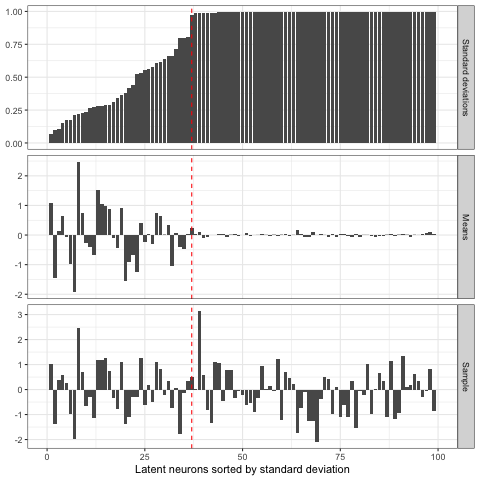

In [19]:
%%R -i zs

theme_set(theme_bw())

p = zs %>% as_tibble %>%
    mutate(variable=factor(variable, levels=c('Standard deviations', 'Means', 'Sample'))) %>%
    ggplot() +
    geom_col(aes(x=level_0, y=value)) +
    scale_x_continuous(lim=c(0, 100)) +
    facet_grid(variable~., scales="free") +
    geom_vline(xintercept = 37, color = "red", lty = "dashed") +
    labs(x='Latent neurons sorted by standard deviation',
        y=NULL)
    
ggsave(here('figures', 'twinkle_latent.pdf'), width=7, height=7)

p

In [20]:
sigmas_sorted = pd.DataFrame(encodings[2]).T.sort_values(0).reset_index()
sigmas_sorted.columns = ['neuron', 'sigma']
sigmas_sorted

neuron     sigma
0       182  0.054064
1        12  0.065152
2       371  0.101236
3       471  0.104032
4       226  0.149428
..      ...       ...
507     413  1.004002
508      92  1.004087
509     189  1.004183
510     375  1.005154
511     198  1.006052

[512 rows x 2 columns]

In [21]:
large_sigmas = (encodings[2] > .95)
large_sigmas.sum()

475

In [22]:
def encodings_2_df(encodings):
    df = pd.DataFrame({"sigma": encodings[2].squeeze(),
                       "central": encodings[1].squeeze(),
                       "variation": encodings[0].squeeze(),
                       })
    df = df.reset_index()
    df.columns = ['neuron','sigma', 'central', 'variation']
    df = df.sort_values('sigma')
    df.insert(0, 'new_name', range(512))
    df['new_name'] = df['new_name'].astype(str)
    df = df.reset_index()
    return df


df = encodings_2_df(encodings)

df['central_1'] = df['central']
df.loc[37:,'central_1'] = 0
df.loc[:37,'central_1'] = 1 + df.loc[:37,'central_1']
df['central_2'] = df['central']
df.loc[37:,'central_2',] = 1
df.loc[:37,'central_2'] = 2 + df.loc[:37,'central_2']
df['central_3'] = df['central']
df.loc[37:,'central_3'] = np.random.randn(512-37)
df['variation_1'] = df['variation']
df.loc[37:,'variation_1'] = 1
df['variation_2'] = df['variation']
df.loc[37:,'variation_2'] = 2

df = df.drop('index', axis='columns')
# df = df.rename(columns={'new_names':'neuron'})

df

new_name  neuron     sigma   central  variation  central_1  central_2  \
0          0     182  0.054064 -1.257066  -1.256710  -0.257066   0.742934   
1          1      12  0.065152  1.071108   1.017243   2.071108   3.071108   
2          2     371  0.101236 -1.444574  -1.393235  -0.444574   0.555426   
3          3     471  0.104032  0.149838   0.391103   1.149838   2.149838   
4          4     226  0.149428  0.645127   0.571083   1.645127   2.645127   
..       ...     ...       ...       ...        ...        ...        ...   
507      507     413  1.004002 -0.042354   2.505459   0.000000   1.000000   
508      508      92  1.004087  0.023457   0.634475   0.000000   1.000000   
509      509     189  1.004183 -0.006117   0.521053   0.000000   1.000000   
510      510     375  1.005154 -0.002851  -1.383290   0.000000   1.000000   
511      511     198  1.006052  0.233724   0.431799   0.000000   1.000000   

     central_3  variation_1  variation_2  
0    -1.257066    -1.256710    -1.256710  
1     1.071108     1.017243     1.017243  
2    -1.444574    -1.393235    -1.393235  
3     0.149838     0.391103     0.391103  
4     0.645127     0.571083     0.571083  
..         ...          ...          ...  
507  -0.393509     1.000000     2.000000  
508   1.559709     1.000000     2.000000  
509   1.360562     1.000000     2.000000  
510   0.702195     1.000000     2.000000  
511   0.133382     1.000000     2.000000  

[512 rows x 10 columns]

In [24]:
for col in df.columns[3:]:
    print(col)
    encoding = df.sort_values('neuron')[col].values.reshape(1,512)
    rns = model.decode(encoding, length=32, temperature=1)[0]
    p = mm.plot_sequence(rns, show_figure=False)
    p.yaxis.axis_label = 'MIDI note'
    p.yaxis.ticker = list(range(1, 130, 1))
    show(p)
    play(rns)
    print()

central



variation



central_1



central_2



central_3



variation_1



variation_2


In [25]:
p.output_backend = "svg"
from bokeh.io import export_svg
filename = "figures/twinkle_out_MIDI"
export_svg(p, filename=filename + ".svg")

# see comment 2
# svglib.register_font('helvetica', '/home/fonts/Helvetica.ttf')
# step 2: read in svg
svg = svglib.svg2rlg(filename+".svg")

# step 3: save as pdf
renderPDF.drawToFile(svg, filename+".pdf")

In [26]:
data = df.melt(id_vars = ['new_name', 'neuron', 'sigma'], var_name = 'encoding', value_name = 'excitation')
data

new_name  neuron     sigma     encoding  excitation
0           0     182  0.054064      central   -1.257066
1           1      12  0.065152      central    1.071108
2           2     371  0.101236      central   -1.444574
3           3     471  0.104032      central    0.149838
4           4     226  0.149428      central    0.645127
...       ...     ...       ...          ...         ...
3579      507     413  1.004002  variation_2    2.000000
3580      508      92  1.004087  variation_2    2.000000
3581      509     189  1.004183  variation_2    2.000000
3582      510     375  1.005154  variation_2    2.000000
3583      511     198  1.006052  variation_2    2.000000

[3584 rows x 5 columns]

In [ ]:
mel_16bar_models = {}
hierdec_mel_16bar_config = configs.CONFIG_MAP['hierdec-mel_16bar']
mel_16bar_models['hierdec_mel_16bar'] = TrainedModel(hierdec_mel_16bar_config, batch_size=4, checkpoint_dir_or_path=BASE_DIR + '/checkpoints/mel_16bar_hierdec.ckpt')

flat_mel_16bar_config = configs.CONFIG_MAP['flat-mel_16bar']
mel_16bar_models['baseline_flat_mel_16bar'] = TrainedModel(flat_mel_16bar_config, batch_size=4, checkpoint_dir_or_path=BASE_DIR + '/checkpoints/mel_16bar_flat.ckpt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

from pathlib import Path
path = Path('/content/drive/My Drive/ml/music/LMD')

subdirs = [x.name for x in path.iterdir() if x.is_dir()]
num_files = []
for subdir in subdirs:
    sub_path = Path(os.path.join(path,subdir))
    num_files.append(len([x for x in sub_path.iterdir() if x.suffix == '.mid']))

artists = pd.DataFrame([subdirs,num_files]).T
artists.columns = ['artist','number_midi_files']

def get_random_midi_file(artist):
    midi_data = [
    tf.io.gfile.GFile(fn, 'rb').read()
    for fn in np.random.choice(tf.io.gfile.glob(os.path.join(path , artist , '*.mid')),1)]
    return midi_data

artists

Mounted at /content/drive


artist number_midi_files
0                      ABBA               171
1                     AC DC                16
2                        U2               111
3            Lynyrd Skynyrd                 7
4                     Queen               218
5               The Beatles               783
6        The Rolling Stones               110
7     Bach Johann Sebastian                78
8             Frank Sinatra                45
9           Chopin Frederic                27
10           Claude Debussy                28
11  Wolfgang Amadeus Mozart                 4
12                 Bee Gees                73
13             Led Zeppelin               148

In [ ]:
extract melodies from a random track

choose_index = np.random.choice(range(artists.shape[0]))

midi_files = get_random_midi_file(artists.artist[choose_index])

input_seqs = [mm.midi_to_sequence_proto(m) for m in midi_files]

mels = []

mels.extend(
      hierdec_mel_16bar_config.data_converter.from_tensors(
          hierdec_mel_16bar_config.data_converter.to_tensors(input_seqs[0])[1]))

for i, ns in enumerate(mels):
  
  print("Melody", i)
  mm.plot_sequence(ns)
  play(ns)

Melody 0


Melody 1


Melody 2


Melody 3


Melody 4


In [ ]:
# did you recognize the artist/track?

print(artists.artist[choose_index])
for i, ns in enumerate(input_seqs):
  print()
  mm.plot_sequence(ns)
  ns_short = mm.extract_subsequence(ns,0,64)
  play(ns_short)

Bach Johann Sebastian



In [ ]:
#for each of the melodies, get the central value for the latent distribution, end decode it
model =  mel_16bar_models['hierdec_mel_16bar']
TOTAL_STEPS = 256
for i, mel in enumerate(mels):
    _, mu, _ = model.encode([mel])
    show(hv.render(pd.DataFrame(mu).T.hvplot.bar(height=100,width=1600)))
    r_mel = model.decode(mu, length=TOTAL_STEPS,temperature=1)[0]
    mm.plot_sequence(r_mel)
    play(r_mel)

In [ ]:
#choose the most representative meldoy by hand, and decode various samples from the latent space
choose_melody = 4
for i in range(3):
    z, _ , _ = model.encode([mels[choose_melody]])
    rns = model.decode(z, length=TOTAL_STEPS, temperature=1)[0]
    show(hv.render(pd.DataFrame(z).T.hvplot.bar(height=100,width=1600)))
    play(rns)
    mm.plot_sequence(rns)

In [ ]:
from google.colab import output
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
!pip install -U plotly
import plotly.express as px

In [ ]:
#process all tracks from all artists

#TOTAL_STEPS = 256

def list_midi_files(artist):
    midi_data = [
    tf.io.gfile.GFile(fn, 'rb').read()
    for fn in sorted(tf.io.gfile.glob(os.path.join(path , artist , '*.mid')))]


results = pd.DataFrame() 
for num_artist, artist in enumerate(artists.artist):
    midi_files = sorted(tf.io.gfile.glob(os.path.join(path, artist , '*.mid')))

    for num_file, midi_file in enumerate(midi_files[:]):
        midi_data = [
            tf.io.gfile.GFile(fn, 'rb').read()
            for fn in sorted(tf.io.gfile.glob(midi_file))]
        input = mm.midi_to_sequence_proto(midi_data[0])
        
        mels = []
        try:
            mels.extend(
                hierdec_mel_16bar_config.data_converter.from_tensors(
                hierdec_mel_16bar_config.data_converter.to_tensors(input)[1]))
        except:
            print('Skipping this track')
            continue

        for num_mel, mel in enumerate(mels):
            output.clear()
            print(f'{num_artist} of {len(artists.artist)} artists')
            print(f'{num_file} of {len(midi_files)} files')
            print(f'{num_mel} of {len(mels)} melodies')

            try:
                _, mu, _ = model.encode([mel])
                results = results.append(pd.DataFrame([artist,Path(midi_file).stem,num_mel]+np.squeeze(mu).tolist()).T,ignore_index=True)

            except:
                print('Skipping this melody')
                continue


0 of 14 artists
30 of 171 files
4 of 5 melodies


KeyboardInterrupt: ignored

In [ ]:
results = res

In [ ]:
results.columns=['artist','title','melody']+list(range(512))
results = results.reset_index(drop=True)
results = results.convert_dtypes()
results.dtypes

artist     string
title      string
melody      Int64
0         float64
1         float64
           ...   
507       float64
508       float64
509       float64
510       float64
511       float64
Length: 515, dtype: object

In [ ]:
#save?
res.to_csv('results.csv')

In [ ]:
results = pd.read_csv('results.csv',index_col=0)
results

artist                  title  melody  ...       509       510       511
0     ABBA       Andante, Andante       0  ... -0.057786  0.046758  0.168423
1     ABBA       Andante, Andante       1  ... -0.254041 -0.171737 -0.077230
2     ABBA       Andante, Andante       2  ...  0.067144  0.479403 -0.055301
3     ABBA       Andante, Andante       3  ...  0.239293 -0.077491  0.217466
4     ABBA       Andante, Andante       4  ...  0.025853  0.112080  0.065857
..     ...                    ...     ...  ...       ...       ...       ...
146   ABBA  Does Your Mother Know       2  ... -0.017604  0.085755 -0.010144
147   ABBA  Does Your Mother Know       3  ... -0.089444 -0.195273  0.174535
148   ABBA                  Eagle       0  ...  0.086326  0.262590 -0.069010
149   ABBA                  Eagle       2  ... -0.121157  0.089228 -0.161588
150   ABBA                  Eagle       4  ...  0.027236  0.339865  0.001054

[151 rows x 515 columns]

In [ ]:
X=res.iloc[:,3:]
#X = StandardScaler().fit_transform(X)
pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(X))
pca_df.columns=['x','y']
data = pd.concat([res.iloc[:,:3],pca_df],axis=1)

In [ ]:
fig=px.scatter(data,facet_col='artist',x='x',y='y',color='title',facet_col_wrap=4)
fig.update_layout(showlegend=False,height=800)
fig.show()

In [ ]:
tsne_np = TSNE(n_components=2, perplexity=5.0, early_exaggeration=12.0, learning_rate=200.0,
     n_iter=10000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='manhattan',
     init='random', verbose=0, random_state=None, method='barnes_hut',
     angle=0.5, n_jobs=-1).fit_transform(X)
tsne_df = pd.DataFrame(tsne_np)
tsne_df.columns=['x','y']
data = pd.concat([res.iloc[:,:3],tsne_df],axis=1)

In [ ]:
fig=px.scatter(data,facet_col='artist',x='x',y='y',color='title',facet_col_wrap=4)
fig.update_layout(showlegend=False,height=800)
fig.show()